<a href="https://colab.research.google.com/github/jscastanos/veggies-cnn/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense,Flatten, MaxPooling2D,Activation
from tensorflow.keras.models import Sequential

# Load Data

In [59]:
# this is my personal npz created from 100 images, 20 images each class
# check my repo for more info https://github.com/jscastanos/veggies

!wget https://github.com/jscastanos/veggies/raw/main/veggies-dataset.npz -O veggies-dataset.npz

path = '/content/veggies-dataset.npz'

--2022-07-28 17:12:07--  https://github.com/jscastanos/veggies/raw/main/veggies-dataset.npz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jscastanos/veggies/main/veggies-dataset.npz [following]
--2022-07-28 17:12:08--  https://raw.githubusercontent.com/jscastanos/veggies/main/veggies-dataset.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2502592 (2.4M) [application/octet-stream]
Saving to: ‘veggies-dataset.npz’

veggies-dataset.npz 100%[===================>]   2.39M  --.-KB/s    in 0.07s   

2022-07-28 17:12:08 (34.6 MB/s) - ‘veggies-dataset.npz’ saved [2502592/2502592]



In [60]:
with np.load(path, allow_pickle=True) as data:
  X_data = data['X_train']
  y_data = data['y_train']

In [19]:
# somehow np array is lost
# hack it for now
X_data = np.array([np.array(val) for val in X_data])
y_data = np.array([np.array(val) for val in y_data])

# Split Training and Test Data

In [20]:
# split train and test 70-30
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30)

# Show Data 

Training Set



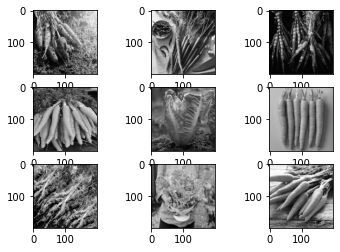

[1 1 1 1 0 1 1 0 1]
Testing Set



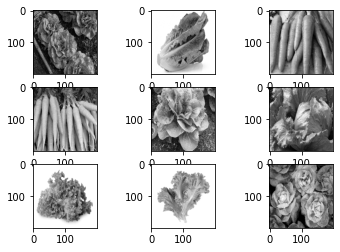

[0 0 1 1 0 0 0 0 0]


In [61]:
from matplotlib import pyplot
print("Training Set\n")
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))

pyplot.show()
print(y_train[0:9])

print("Testing Set\n")
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_test[i],cmap=pyplot.get_cmap('gray'))

pyplot.show()
print(y_test[0:9])

# Normalize Data

In [22]:
X_train, X_test = X_train/255.0 , X_test/255.0

# Convolutional Neural Network

In [24]:
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=(250, 250, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=20, epochs=5)


Epoch 1/5
2/2 [==============================] - 5s 1s/step - loss: 3.5040 - accuracy: 0.3929
Epoch 2/5
2/2 [==============================] - 4s 1s/step - loss: 2.3306 - accuracy: 0.6071
Epoch 3/5
2/2 [==============================] - 3s 1s/step - loss: 0.6785 - accuracy: 0.6429
Epoch 4/5
2/2 [==============================] - 3s 1s/step - loss: 0.4919 - accuracy: 0.8929
Epoch 5/5
2/2 [==============================] - 3s 998ms/step - loss: 0.3619 - accuracy: 0.8571
